In [0]:
#RDD: Data Cleaning and Data Preparation: Defining Filename Variables 
#Writing general-reusable code to ensure switching between different versions ("Clinicaltrial_<year>.csv") of the datasets that require only the change of one variable. Implemented using "filename<#>" variables which are defined for each file name that needs to be prepared.  

filename1 = "clinicaltrial_2021"
filename2 = "pharma"

#Local filesystem or shell command line doesn’t understand "filename” variable. Hence, creating an OS variable to make this variable accessible by the command line using the following script.
import os
os.environ['filename1'] = filename1
os.environ['filename2'] = filename2

In [0]:
#RDD: Data Cleaning: Cleaning the local file system and the DBFS from the contents that the notebook needs to create again.
#Following is mandatory to make this notebook rerunnable,
#1) Removing two existing .csv files(clinicaltrial_2021.csv and pharma.csv) from the Default location of the Databricks File System(DBFS) "FileStore/tables/" (Done in python command line)
#2) Removing Two existing Zip files(clinicaltrial_2021.zip and pharma.zip) from Temporary filesystem "file:/tmp/" (Done in Shell command line)

dbutils.fs.rm("FileStore/tables/"+ filename1 +".csv" ) 
dbutils.fs.rm("FileStore/tables/"+ filename2 +".csv" ) 

Out[2]: True

In [0]:
%sh 
rm /tmp/$filename1.zip
rm /tmp/$filename2.zip

rm: cannot remove '/tmp/clinicaltrial_2021.zip': No such file or directory
rm: cannot remove '/tmp/pharma.zip': No such file or directory


In [0]:
#RDD: Data Preparation - Step 1 : Verifying the existence of 2 uploaded Zip files clinicaltrial_2021.zip and pharma.zip, at "/FileStore/tables/"  which is the Databricks File System(DBFS) where the Databricks UI uploads the file by default.
dbutils.fs.ls("/FileStore/tables/")

Out[4]: [FileInfo(path='dbfs:/FileStore/tables/ accounts/', name=' accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ logs/', name=' logs/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ webpage/', name=' webpage/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021DF_FA2.csv/', name='CT2021DF_FA2.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021Q5DF.csv/', name='CT2021Q5DF.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1677847177000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677836655000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677686371000),
 FileInfo(path='dbfs:/FileStore/tables/Q

In [0]:
#RDD: Data Preparation - Step 2 : Extracting two zip files.
#dbutils toolkit doesn't provide an unzip command. Therefore, the files needed to be copied to the driver node (local file system), extract there using a shell command, and copy back the extracted content into DBFS. 
#Now, Copying the 2 uploaded .zip files from DBFS to local file system

dbutils.fs.cp("FileStore/tables/" + filename1 + ".zip", "file:/tmp/")
dbutils.fs.cp("FileStore/tables/" + filename2 + ".zip", "file:/tmp/")


Out[5]: True

In [0]:
%sh
unzip -d /tmp/ /tmp/$filename1.zip
unzip -d /tmp/ /tmp/$filename2.zip


Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#RDD: Data Preparation - Step 4 : Verifying the unzipped files existence in the Local file system 
#unzipped files are available under /tmp/clinicaltrial_2021.csv  There are single files each
dbutils.fs.ls("file:/tmp/")

Out[7]: [FileInfo(path='file:/tmp/hsperfdata_root/', name='hsperfdata_root/', size=4096, modificationTime=1681991840672),
 FileInfo(path='file:/tmp/RtmpO55ruU/', name='RtmpO55ruU/', size=4096, modificationTime=1681990831056),
 FileInfo(path='file:/tmp/driver-daemon-params', name='driver-daemon-params', size=19, modificationTime=1681990698032),
 FileInfo(path='file:/tmp/tmpqqagh6ic/', name='tmpqqagh6ic/', size=4096, modificationTime=1681991292558),
 FileInfo(path='file:/tmp/.ICE-unix/', name='.ICE-unix/', size=4096, modificationTime=1681990673952),
 FileInfo(path='file:/tmp/.font-unix/', name='.font-unix/', size=4096, modificationTime=1681990673952),
 FileInfo(path='file:/tmp/tmp72utc2yq/', name='tmp72utc2yq/', size=4096, modificationTime=1681991533085),
 FileInfo(path='file:/tmp/tmp5pog9gwt/', name='tmp5pog9gwt/', size=4096, modificationTime=1681991165823),
 FileInfo(path='file:/tmp/tmpdk_m1_ee/', name='tmpdk_m1_ee/', size=4096, modificationTime=1681991112131),
 FileInfo(path='file:/tm

In [0]:
#RDD: Data Preparation - Step 5 : Moving the 2 unzipped files from Local file system to DBFS
dbutils.fs.mv("file:/tmp/" + filename1+".csv" , "FileStore/tables/" + filename1 +".csv", True)
dbutils.fs.mv("file:/tmp/" + filename2+".csv" , "FileStore/tables/" + filename2 +".csv", True)

Out[8]: True

In [0]:
#RDD: Data Preparation - Step 6 :  Verifying the existence of the moved files in the DBFS
dbutils.fs.ls("/FileStore/tables/")

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/ accounts/', name=' accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ logs/', name=' logs/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/ webpage/', name=' webpage/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021DF_FA2.csv/', name='CT2021DF_FA2.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/CT2021Q5DF.csv/', name='CT2021Q5DF.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1677847177000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677836655000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677686371000),
 FileInfo(path='dbfs:/FileStore/tables/Q

In [0]:
#RDD: Data Preparation - Step 7 :Data Verification 
#Checking the first few lines of the clinicaltrial_2021.csv file to understand the data format 
dbutils.fs.head("FileStore/tables/" + filename1 +".csv")

[Truncated to first 65536 bytes]
Out[10]: "Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions\r\nNCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||\r\nNCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|\r\nNCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|\r\nNCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|\r\nNCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|\r\nNCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate\r\nNCT02752438|Ankara University|Unk

In [0]:
#RDD: Data Preparation - Step 8 :Data Verification 
#Checking the first few lines of the pharma.csv to understand the data format 
dbutils.fs.head("FileStore/tables/" + filename2 +".csv")

[Truncated to first 65536 bytes]
Out[11]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to in

In [0]:
#RDD: Data Preparation - Step 9 : Creating RDDs from the clinicaltrial1_2021.csv and pharma.csv
#sc.textFile method is used to create seperate RDDs for the clinicaltrial_2021.csv and pharma.csv files respectively. 
clinicaltrial21rdd = sc.textFile("/FileStore/tables/"+ filename1 +".csv")
Pharmardd = sc.textFile("/FileStore/tables/"+ filename2 +".csv")

In [0]:
#RDD: Data Preparation - Step 10 : Viewing few contents of the ClinicalTrial RDD
clinicaltrial21rdd.take(5)

Out[13]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

In [0]:
#RDD: Data Preparation - Step 11 : Removing the Header row of clinicaltrial dataset
#1)Copying and Checking the first row of clinicaltrial21rdd RDD
header1 = clinicaltrial21rdd.first()
header1 

Out[14]: 'Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions'

In [0]:
#RDD 2)Removing the header row i.e., first row from the RDD
clinicaltrial21rdd = clinicaltrial21rdd.filter(lambda row: row != header1)

In [0]:
#RDD: Data Preparation - Step 12 :  Split each row by piping | symbol and saving back in clinicaltrial21rdd
clinicaltrial21rdd = clinicaltrial21rdd.map(lambda row: row.split("|"))


In [0]:
#RDD Question# 1 Findind distinct studies in ClinicalTrial2021 by unique count on ID column
#Extracting the ID and Sponsor columns using Map transformations
clinicaltrial21rdd1 = clinicaltrial21rdd.map(lambda row: (row[0], row[1]))
clinicaltrial21rdd1.take(5)

Out[17]: [('NCT02758028', 'The University of Hong Kong'),
 ('NCT02751957', 'Duke University'),
 ('NCT02758483', 'Universidade Federal do Rio de Janeiro'),
 ('NCT02759848', 'Istanbul Medeniyet University'),
 ('NCT02758860', 'University of Roma La Sapienza')]

In [0]:
#RDD Question# 1 Finding Count of Distinct Studies using distinct.count() method in clinicaltrial21rdd1 
StudiesCount_2021 = clinicaltrial21rdd1.distinct().count()
print("Distinct number of Studies for the given 2021 Clinical Trial is:", StudiesCount_2021)

Distinct number of Studies for the given 2021 Clinical Trial is: 387261


In [0]:
#RDD Question# 2 Count of Distinct Type of Studies with display in Descending Order
#Extracted the 6th column Type Column(it's index is 5) and stored as a Pair RDD implementing a lambda function that takes row of clinicaltrial21rdd inside map() transformation.  Returns a Tuple as (Type as key, 1 )

CTrdd21 = clinicaltrial21rdd.map(lambda row: (row[5], 1))

#(Type as key, 1 ) Paired RDD enables to apply the reduceByKey() transformation that reduces the values associated with the Key by summing the original values using the lambda function a,b : a+b . Thus, returns count of distinct Type
CTrdd21.reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], False)

Out[19]: PythonRDD[4297] at RDD at PythonRDD.scala:58

In [0]:
#RDD Question# 3
#Extracting & Checking the 'Conditions'(its index is 7) column values using the map() transformation method with take() action to view first 5 rows.

clinicaltrial21rdd.map(lambda row:  row[7]).take(5)

Out[20]: ['',
 'Autistic Disorder,Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis,Lung Diseases,Pulmonary Disease',
 'Diverticular Diseases,Diverticulum,Diverticulosis']

In [0]:
#Below code extracts the Conditions column using map() transformation that returns a tuple (1, row[7]) using lambda function 
Q3CTrdd21 = clinicaltrial21rdd.map(lambda row: (1, row[7]))
Q3CTrdd21.take(5)

Out[21]: [(1, ''),
 (1, 'Autistic Disorder,Autism Spectrum Disorder'),
 (1, 'Diabetes Mellitus'),
 (1, 'Tuberculosis,Lung Diseases,Pulmonary Disease'),
 (1, 'Diverticular Diseases,Diverticulum,Diverticulosis')]

In [0]:
#flatMapValues() transformation applied on Conditions column to split and flatten the array of elements and forms a tuple with key as one and each value is one of the resulting values of the split operation delimited by commas using Lambda function 
Q3CTrdd21 = Q3CTrdd21.flatMapValues(lambda row : row.split(","))
Q3CTrdd21.take(5)


Out[22]: [(1, ''),
 (1, 'Autistic Disorder'),
 (1, 'Autism Spectrum Disorder'),
 (1, 'Diabetes Mellitus'),
 (1, 'Tuberculosis')]

In [0]:
#Swapping the columns of above paired RDD inorder to apply reduceByKey() transformation
Q3CTrdd21 = Q3CTrdd21.map(lambda row: (row[1],row[0]))

#Removing the empty strings from the first column using filter() method
Q3CTrdd21_filtered = Q3CTrdd21.filter(lambda row: row[0] != '')  
#reduceByKey() transformation applied the paired RDD to reduce the values associated with the Key by summing the original values using the lambda function a,b : a+b. Thus, returns the exact count of most common top 5 Conditions.
Q3CTrdd21_filtered.reduceByKey(lambda a,b : (a + b)).sortBy(lambda x: x[1], False ).take(5)

Out[23]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

In [0]:
#RDD Question# 4 - 10 Most common Sponsors who are non-Pharmaceutical Companies
#Step1: Data cleaning of Pharmardd RDD by filtering the header and splitting the data by comma
Ph_header = Pharmardd.first()
Pharmardd1 = Pharmardd.filter(lambda row: row != Ph_header )
Pharmardd1 = Pharmardd1.map(lambda row: row.split(","))
print(Pharmardd1.take(1))

[['"Abbott Laboratories"', '"Abbott Laboratories"', '"$5', '475', '000"', '"$0"', '"$5', '475', '000"', '"2013"', '"20131227"', '"government-contracting-related offenses"', '"False Claims Act and related"', '"kickbacks and bribery"', '"Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid', ' biliary and peripheral vascular products."', '"federal"', '"agency action"', '"Justice Department Civil Division"', '"civil"', '""', '""', '""', '""', '""', '""', '""', '""', '""', '""', '""', '"USA"', '"Illinois"', '"publicly traded"', '"ABT"', '"pharmaceuticals"', '"pharmaceuticals"', '"https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians"', '""']]


In [0]:
#RDDQ4:Step2: Filtering data by eliminating double quotes using Strip method. 
#Strip() called through an User Defined function removeDblquote(phrase).Stored the result in another RDD Pharmardd1 with distinct values of Parant_Company row[1]
def removeDblquote(phrase):
    return phrase.strip('\"')

Pharmardd2 = Pharmardd1.map(lambda row: removeDblquote(row[1])).distinct()
Pharmardd2.take(2)

Out[25]: ['Abbott Laboratories', 'AbbVie']

In [0]:
#RDDQ4:Step3: Created a Set out of collected list of Pharmardd1 items, inorder to compare and validate Sponsor column of clinicalTrial RDD with Pharma's Parent_Company column
PharmaList = Pharmardd2.collect()
Pharma_set = set(PharmaList)

In [0]:
#RDDQ4:Step4: Extracting ID and Sponsor columns from the RDD(Q4Ct_2021)
Q4Ct_2021RDD = clinicaltrial21rdd.map(lambda row: (row[0], row[1].strip()))
Q4Ct_2021RDD.take(10)

Out[27]: [('NCT02758028', 'The University of Hong Kong'),
 ('NCT02751957', 'Duke University'),
 ('NCT02758483', 'Universidade Federal do Rio de Janeiro'),
 ('NCT02759848', 'Istanbul Medeniyet University'),
 ('NCT02758860', 'University of Roma La Sapienza'),
 ('NCT02757209', 'Consorzio Futuro in Ricerca'),
 ('NCT02752438', 'Ankara University'),
 ('NCT02753543', 'Ruijin Hospital'),
 ('NCT02757508', 'Washington University School of Medicine'),
 ('NCT02753530', 'Orphazyme')]

In [0]:
#RDDQ4:Step5: Filtering the Non Pharmaceutical Sponsor from the RDD Q4Ct_2021RDD with respect to Pharma_set 
Q4Ct_2021RDD  = Q4Ct_2021RDD.filter(lambda row: row[1] not in Pharma_set)
Q4Ct_2021RDD.count()
print("Total Non Pharma Sponsors in the RDD given ClinicalTrial is: ", Q4Ct_2021RDD.count())

Total Non Pharma Sponsors in the RDD given ClinicalTrial is:  371224


In [0]:
#RDDQ4:Step6: map() and reduceByKey() transformations are used to eliminate the duplicates to get final result for Q4 Analysis. 
Q4Ct_2021RDD = Q4Ct_2021RDD.map(lambda x: (x[1], 1))

Q4Ct_2021RDD_res =Q4Ct_2021RDD.reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], False)
Q4Ct_2021RDD_res.take(10)

Out[29]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

In [0]:
#RDD Question#5: Step1: Extracting the Status row[2] and Completion row[4] Column values
Q521RDD = clinicaltrial21rdd.map(lambda row: (row[2], row[4]))

In [0]:
#RDDQ5:Step2: Empty strings of Completion column eliminated while filtering. Noted that ‘Completions’ column data-format is ‘<3 chrs-month> <year>’ Eg:’Jun 2021’  split using split() method that splits by space by default results an array of two items. Thus, taken the second array element to compare the year 2021.
Q521RDD1 =Q521RDD.filter(lambda row : row[1] != '' and row[0] =='Completed' and row[1].split(" ")[1] =='2021'  )
print("Completed Studies in 2021 : " ,Q521RDD1.count())

Completed Studies in 2021 :  8571


In [0]:
#RDDQ5:Step3: To group by Completion’s Month, applied split() method that  splits by space and extracted the month which is first array element. This is to apply reduceByKey() to find monthly count.
Q521RDD2 = Q521RDD1.map(lambda row: (row[1].split(" ")[0], 1 ))
Q521RDD2.take(10)

Out[32]: [('Jan', 1),
 ('Jun', 1),
 ('Mar', 1),
 ('Jan', 1),
 ('May', 1),
 ('Feb', 1),
 ('Feb', 1),
 ('May', 1),
 ('Aug', 1),
 ('May', 1)]

In [0]:
#RDDQ5:Step4: Solution arrived using reduceByKey() transformation on Q521RDD2
Q521RDD3 = Q521RDD2.reduceByKey(lambda a,b : (a + b)).sortBy(lambda x: x[1], False)
Q521RDD3.collect()

Out[33]: [('Mar', 1227),
 ('Jan', 1131),
 ('Jun', 1094),
 ('May', 984),
 ('Apr', 967),
 ('Feb', 934),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
#RDDQ5:Step5: Enumeration list created on Months for sorting the Months in  RDD(Q521RDD3). Imported the calendar library to call calendar.month_abbr() function on the 3 characters month Name of ‘Completion’ column.
import calendar
#Ref: #https://stackoverflow.com/questions/71768512/sort-by-key-month-using-rdds-in-pyspark
# The 3 letter short form of the Month is Enumerated with respect to numerical value 1 to 12
#Jan:1, Feb:2, Mar:3, Apr:4, May:5, Jun:6, Jul:7, Aug:8, Sep:9, Oct:10, Nov:11,Dec: 12}
orderbymonth = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}
Q521RDD3 = Q521RDD3.sortBy(lambda row: orderbymonth.get(row[0])) 
Q521RDD3.collect()

Out[34]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

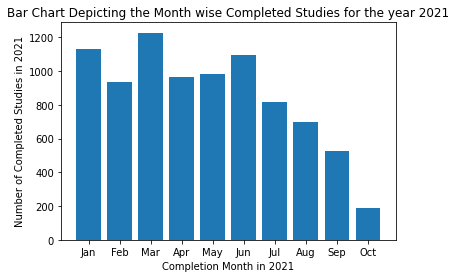

In [0]:
#RDDQ5:Step6: Two Visualizations implemented for RDD Q#5: 1)matplotlib Python library and 2)PowerBI
#Below Visualization code is using MATPLOTLIB
import matplotlib.pyplot as plt

sorted_counts = Q521RDD3.collect()
#First element of each tuple as months
months = [count[0] for count in sorted_counts]
#Second element of each tuple as monthly_counts 
monthly_counts = [count[1] for count in sorted_counts]

plt.bar(months, monthly_counts)
plt.title("Bar Chart Depicting the Month wise Completed Studies for the year 2021")
plt.xlabel("Completion Month in 2021")
plt.ylabel("Number of Completed Studies in 2021")
plt.show() 

In [0]:
#RDDQ5:Step7: Created Dataframe using the same lists of step6. This is to create CSV file and then to SQL table for PowerBI visualization. 
#Reference: https://www.geeksforgeeks.org/how-to-create-a-pyspark-dataframe-from-multiple-lists/
#S_No used as supporting column for ordering the month
sno = list(range(1, 11))
columns = ['S_No','CompletionMonth2021', 'CompletedStudies_2021']  
# creating a dataframe by zipping the two lists
Q521_dataframe = spark.createDataFrame(zip(sno, months, monthly_counts), columns)  
Q521_dataframe.show()

+----+-------------------+---------------------+
|S_No|CompletionMonth2021|CompletedStudies_2021|
+----+-------------------+---------------------+
|   1|                Jan|                 1131|
|   2|                Feb|                  934|
|   3|                Mar|                 1227|
|   4|                Apr|                  967|
|   5|                May|                  984|
|   6|                Jun|                 1094|
|   7|                Jul|                  819|
|   8|                Aug|                  700|
|   9|                Sep|                  528|
|  10|                Oct|                  187|
+----+-------------------+---------------------+



In [0]:
#RDD Q5: Step8: Result is written to a CSV file for creating SQL table for generating POWERBI visualization. However, .csv file is priorly deleted to ensure code reusability.
dbutils.fs.rm("/FileStore/tables/Q521RDDto_dataframe.csv", True )  
Q521_dataframe.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/Q521RDDto_dataframe.csv")

In [0]:
%sql
--RDD Q5:  Step9: Table creation for POWER BI Visualization for Visual Story telling on the Analysis
DROP TABLE IF EXISTS CT2021RDDQ5_CompletedStudies;
CREATE TABLE CT2021RDDQ5_CompletedStudies
using csv
options (path "dbfs:/FileStore/tables/Q521RDDto_dataframe.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021RDDQ5_CompletedStudies order by s_no;

S_No,CompletionMonth2021,CompletedStudies_2021
1,Jan,1131
2,Feb,934
3,Mar,1227
4,Apr,967
5,May,984
6,Jun,1094
7,Jul,819
8,Aug,700
9,Sep,528
10,Oct,187


In [0]:
#RDD:Question#6 Further Analysis 1 : Top 10 most common Interventions of 2021
CTFA1RDD = clinicaltrial21rdd.map(lambda row: (row[8], 1))
#RDD Q6: Step1: Removing the empty strings from the first column
CTFA1RDD_filtered = CTFA1RDD.filter(lambda row: row[0] != '') 
#reduceByKey() transformation used to form paired RDD to reduce the values associated with the Key by summing the original values using the lambda function a,b : a+b. Thus, returns the exact count of most common top 10 Interventions.
CTFA1RDD_filtered1 = CTFA1RDD_filtered.reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], False).take(10)
CTFA1RDD_filtered1

Out[39]: [('Vaccines', 1771),
 ('Anesthetics', 779),
 ('Insulin', 738),
 ('Pembrolizumab', 708),
 ('Metformin', 689),
 ('Lidocaine', 660),
 ('Antibodies', 616),
 ('Bupivacaine', 605),
 ('Nicotine', 559),
 ('Botulinum Toxins,abobotulinumtoxinA', 505)]

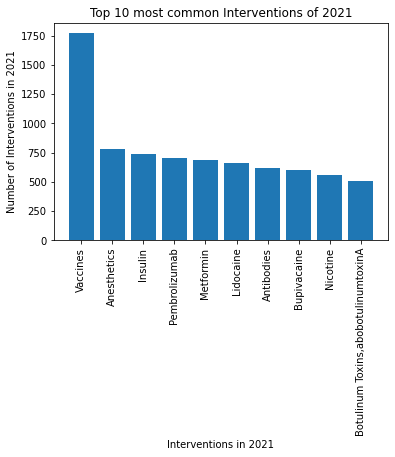

In [0]:
#RDDQ6:Step2: Two Visualizations implemented for CTFA1RDD_filtered1. Q#6: 1)matplotlib Python library and 2)PowerBI
#Below Visualization code is done using MATPLOTLIB Python library
import matplotlib.pyplot as plt
sorted_counts = CTFA1RDD_filtered1 
Interventions = [count[0] for count in sorted_counts]
Counts = [count[1] for count in sorted_counts]
 
plt.bar(Interventions, Counts)
plt.title("Top 10 most common Interventions of 2021")
plt.xlabel("Interventions in 2021")
plt.xticks(rotation=90)
plt.ylabel("Number of Interventions in 2021")
plt.show() 

In [0]:
#RDDQ6:Step3: Creating DataFrame Using the same list of items from step2   
columns = ['Interventions', 'Counts']  
# creating a dataframe by zipping the two lists
QFA1_2021_dataframe = spark.createDataFrame(zip(Interventions, Counts), columns)  
#show data frame
QFA1_2021_dataframe.show()

+--------------------+------+
|       Interventions|Counts|
+--------------------+------+
|            Vaccines|  1771|
|         Anesthetics|   779|
|             Insulin|   738|
|       Pembrolizumab|   708|
|           Metformin|   689|
|           Lidocaine|   660|
|          Antibodies|   616|
|         Bupivacaine|   605|
|            Nicotine|   559|
|Botulinum Toxins,...|   505|
+--------------------+------+



In [0]:
#RDDQ6:Step4: Deleting existing CSV file(to ensure code reusability) and (re)creating CSV file by writing data from the Dataframe this is to create Table for Power BI Visualization
dbutils.fs.rm("/FileStore/tables/QFA1_2021_dataframe.csv", True )  
QFA1_2021_dataframe.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/QFA1_2021_dataframe.csv")

In [0]:
%sql
--RDDQ6: Step5: Table creation for Visualization for Question 5 using  POWER BI
DROP TABLE IF EXISTS CT2021RDDFA1_INTERVENTIONS;
CREATE TABLE CT2021RDDFA1_INTERVENTIONS
using csv
options (path "dbfs:/FileStore/tables/QFA1_2021_dataframe.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021RDDFA1_INTERVENTIONS ORDER BY COUNTS DESC ;

Interventions,Counts
Vaccines,1771
Anesthetics,779
Insulin,738
Pembrolizumab,708
Metformin,689
Lidocaine,660
Antibodies,616
Bupivacaine,605
Nicotine,559
"Botulinum Toxins,abobotulinumtoxinA",505


In [0]:
#RDDQuestion # 7 (Further Analysis 2)
#Month Wise List of "Active, not recruiting" Studies - Submitted and Completed on the same year 2021 from the Clinical Trial 2021
#RDDQ7:Step1: Filtering the Status[2], Completion[4] and Submission[6] columns using MAP transformations
CTFA2RDD = clinicaltrial21rdd.map(lambda row: (row[2], row[4], row[6]))
CTFA2RDD.take(10)

Out[44]: [('Recruiting', 'Nov 2021', 'Apr 2016'),
 ('Completed', 'Jul 2020', 'Apr 2016'),
 ('Completed', 'Jan 2018', 'Apr 2016'),
 ('Completed', 'Dec 2014', 'May 2016'),
 ('Active, not recruiting', 'Sep 2020', 'Apr 2016'),
 ('Completed', 'Jan 2018', 'Apr 2016'),
 ('Unknown status', 'Jul 2017', 'Apr 2016'),
 ('Unknown status', 'Nov 2019', 'Apr 2016'),
 ('Completed', 'Jul 2017', 'Apr 2016'),
 ('Completed', 'Jan 2021', 'Apr 2016')]

In [0]:
#RDDQ7:Step2: Filtering only  non empty string in Start column with Status=Completed as well as both Completion and Submission column containing the year 2021 as second array element when splitting each of the column values by space. 
CTFA2RDD1 =CTFA2RDD.filter(lambda row : row[1] != '' and row[0] =='Active, not recruiting' and row[1].split(" ")[1] =='2021'  and row[2].split(" ")[1] =='2021' )
CTFA2RDD1.take(10)
print("2021 : " , CTFA2RDD1.count())
CTFA2RDD1.take(10)

2021 :  620
Out[45]: [('Active, not recruiting', 'Dec 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Dec 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Oct 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Jul 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Dec 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Nov 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Sep 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Feb 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Apr 2021', 'Jan 2021'),
 ('Active, not recruiting', 'Oct 2021', 'Jan 2021')]

In [0]:
#RDDQ7:Step3: Final grouping on every month of Submission column of year 2021
CTFA2RDD2 = CTFA2RDD1.map(lambda row: (row[2].split(" ")[0], 1 ))
#Q519rdd3.take(100)
CTFA2RDD3 = CTFA2RDD2.reduceByKey(lambda a,b : (a + b))
CTFA2RDD3.take(12)

Out[46]: [('May', 68),
 ('Jan', 81),
 ('Mar', 89),
 ('Feb', 96),
 ('Apr', 70),
 ('Jun', 64),
 ('Aug', 51),
 ('Jul', 47),
 ('Sep', 36),
 ('Oct', 18)]

In [0]:
#RDDQ7:Step4: Enumaration list created on Months for sorting the Months in  RDD(CTFA2RDD3). Imported the calendar library to call calendar.month_abbr() function on the 3 characters month Name of ‘Submission’ column.
import calendar
#https://stackoverflow.com/questions/71768512/sort-by-key-month-using-rdds-in-pyspark
# The 3 letter short form of the Month enumerated with respect to numerical value
#Jan:1, Feb:2, Mar:3, Apr:4, May:5, Jun:6, Jul:7, Aug:8, Sep:9, Oct:10, Nov:11,Dec: 12}
orderbymonth = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}
CTFA2RDD3 = CTFA2RDD3.sortBy(lambda row: orderbymonth.get(row[0])) 
CTFA2RDD3.collect() 

Out[47]: [('Jan', 81),
 ('Feb', 96),
 ('Mar', 89),
 ('Apr', 70),
 ('May', 68),
 ('Jun', 64),
 ('Jul', 47),
 ('Aug', 51),
 ('Sep', 36),
 ('Oct', 18)]

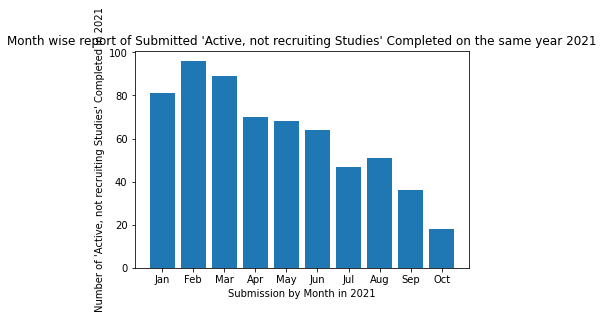

In [0]:
#RDDQ7:Step5: Two Visualizations implemented for CTFA2RDD3. Q#7: 1)matplotlib Python library and 2)PowerBI
#Below Visualization code is done using MATPLOTLIB Python library

import matplotlib.pyplot as plt
sorted_counts = CTFA2RDD3.collect()
ActiveNonRecruit_months = [count[0] for count in sorted_counts]
ActiveNonRecruit_counts = [count[1] for count in sorted_counts]

#x= months, y= monthly_counts
plt.bar(ActiveNonRecruit_months, ActiveNonRecruit_counts)
plt.title("Month wise report of Submitted 'Active, not recruiting Studies' Completed on the same year 2021")
plt.xlabel("Submission by Month in 2021")
plt.ylabel("Number of 'Active, not recruiting Studies' Completed in 2021")
plt.show() 

In [0]:
#RDDQ7:Step6: Created Dataframe using the same lists of step5. This is to create CSV file and then to SQL table for PowerBI visualization.
#Inorder to store the rows into the table in the same order from the follwoing Dataframe we need a supporting column S_No for ordering the month
sno = list(range(1, 11))
columns = ['S_No','SubmissionByMonth_2021', 'Completed_Active_NonRecruitingStudies_2021']
  
# creating a dataframe by zipping the two lists
QFA2021_dataframe = spark.createDataFrame(zip(sno, ActiveNonRecruit_months, ActiveNonRecruit_counts), columns)
  
#show data frame
QFA2021_dataframe.show()

+----+----------------------+------------------------------------------+
|S_No|SubmissionByMonth_2021|Completed_Active_NonRecruitingStudies_2021|
+----+----------------------+------------------------------------------+
|   1|                   Jan|                                        81|
|   2|                   Feb|                                        96|
|   3|                   Mar|                                        89|
|   4|                   Apr|                                        70|
|   5|                   May|                                        68|
|   6|                   Jun|                                        64|
|   7|                   Jul|                                        47|
|   8|                   Aug|                                        51|
|   9|                   Sep|                                        36|
|  10|                   Oct|                                        18|
+----+----------------------+----------------------

In [0]:
#RDDQ7:Step7: Deleting existing CSV file(to ensure code reusability) and (re)creating CSV by writing data file from the Dataframe this is to create Table for Power BI Visualization
dbutils.fs.rm("/FileStore/tables/QFA2021_dataframe.csv", True )  
QFA2021_dataframe.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/QFA2021_dataframe.csv")

In [0]:
%sql
--RDDQ7:Step8: Table creation for Visualization using POWER BI
DROP TABLE IF EXISTS CT2021RDDFA_ACTIVE_NONRECRUITStudies;
CREATE TABLE CT2021RDDFA_ACTIVE_NONRECRUITStudies
using csv
options (path "dbfs:/FileStore/tables/QFA2021_dataframe.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021RDDFA_ACTIVE_NONRECRUITStudies order by s_no;

S_No,SubmissionByMonth_2021,Completed_Active_NonRecruitingStudies_2021
1,Jan,81
2,Feb,96
3,Mar,89
4,Apr,70
5,May,68
6,Jun,64
7,Jul,47
8,Aug,51
9,Sep,36
10,Oct,18


In [0]:
#RDD QUESTION# 8 (Further Analysis# 3) Month Wise List of 'Completed' Status Studies with Submission and completion on the same year 2021 from the Clinical Trial 2021
#RDDQ8:Step1: Filtering the Status[2], Completion[4] and Submission[6] columns using MAP transformations
QFA3_2021RDD = clinicaltrial21rdd.map(lambda row: (row[2], row[4], row[6]))
QFA3_2021RDD.take(10)

Out[52]: [('Recruiting', 'Nov 2021', 'Apr 2016'),
 ('Completed', 'Jul 2020', 'Apr 2016'),
 ('Completed', 'Jan 2018', 'Apr 2016'),
 ('Completed', 'Dec 2014', 'May 2016'),
 ('Active, not recruiting', 'Sep 2020', 'Apr 2016'),
 ('Completed', 'Jan 2018', 'Apr 2016'),
 ('Unknown status', 'Jul 2017', 'Apr 2016'),
 ('Unknown status', 'Nov 2019', 'Apr 2016'),
 ('Completed', 'Jul 2017', 'Apr 2016'),
 ('Completed', 'Jan 2021', 'Apr 2016')]

In [0]:
#RDDQ8:Step2:  Filetering only those rows not having empty string in Completion column, Status equal to Completed as well both Completion and Submission column contains the year 2021 as second array element when splitting each of the column values by space. 
QFA3_2021RDD1 = QFA3_2021RDD.filter(lambda row : row[1] != '' and row[0] =='Completed' and row[1].split(" ")[1] =='2021'  and row[2].split(" ")[1] =='2021' )
QFA3_2021RDD1.take(10)
print("Filter count for CT 2021 : " , QFA3_2021RDD1.count())
QFA3_2021RDD1.take(10)

Filter count for CT 2021 :  2189
Out[53]: [('Completed', 'Aug 2021', 'Jan 2021'),
 ('Completed', 'Jun 2021', 'Jan 2021'),
 ('Completed', 'Aug 2021', 'Jan 2021'),
 ('Completed', 'Jan 2021', 'Jan 2021'),
 ('Completed', 'Jun 2021', 'Jan 2021'),
 ('Completed', 'Jun 2021', 'Jan 2021'),
 ('Completed', 'Aug 2021', 'Jan 2021'),
 ('Completed', 'Apr 2021', 'Jan 2021'),
 ('Completed', 'Mar 2021', 'Jan 2021'),
 ('Completed', 'Jan 2021', 'Jan 2021')]

In [0]:
#RDDQ8:Step3: Finall grouping on every month of Submission column of year 2021
QFA3_2021RDD2 = QFA3_2021RDD1.map(lambda row: (row[2].split(" ")[0], 1 ))
#Q519rdd3.take(100)
QFA3_2021RDD3 = QFA3_2021RDD2.reduceByKey(lambda a,b : (a + b))
QFA3_2021RDD3.take(12)

Out[54]: [('May', 228),
 ('Jan', 270),
 ('Mar', 314),
 ('Feb', 255),
 ('Apr', 269),
 ('Jun', 242),
 ('Aug', 187),
 ('Jul', 197),
 ('Sep', 155),
 ('Oct', 72)]

In [0]:
#RDDQ8:Step4: Enumaration list created on Months for sorting the Months in  RDD(QFA3_2021RDD3). Imported the calendar library to call calendar.month_abbr() function on the 3 characters month Name of ‘Submission’ column.
import calendar
# The 3 letter short form of the Month enumerated with respect to numerical value
#Jan:1, Feb:2, Mar:3, Apr:4, May:5, Jun:6, Jul:7, Aug:8, Sep:9, Oct:10, Nov:11,Dec: 12}
orderbymonth = {i:e for e,i in enumerate(calendar.month_abbr[1:],1)}
QFA3_2021RDD3 = QFA3_2021RDD3.sortBy(lambda row: orderbymonth.get(row[0])) 
QFA3_2021RDD3.collect()

Out[55]: [('Jan', 270),
 ('Feb', 255),
 ('Mar', 314),
 ('Apr', 269),
 ('May', 228),
 ('Jun', 242),
 ('Jul', 197),
 ('Aug', 187),
 ('Sep', 155),
 ('Oct', 72)]

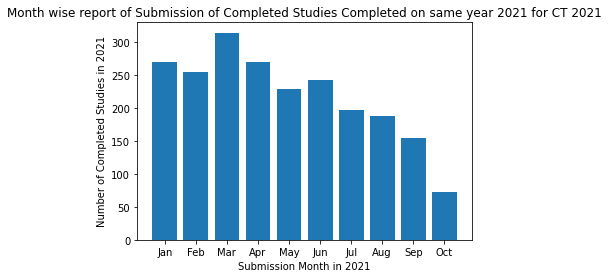

In [0]:
#RDDQ8:Step5:  Two Visualizations implemented for QFA3_2021RDD3. Q8: 1)matplotlib Python library and 2)PowerBI
#Below Visualization code is done using MATPLOTLIB Python library
import matplotlib.pyplot as plt
sorted_counts = QFA3_2021RDD3.collect()
CompSub_months = [count[0] for count in sorted_counts]
CompSub_monthly_counts = [count[1] for count in sorted_counts]

#x= months, y= monthly_counts
plt.bar(CompSub_months, CompSub_monthly_counts)
plt.title("Month wise report of Submission of Completed Studies Completed on same year 2021 for CT 2021")
plt.xlabel("Submission Month in 2021")
plt.ylabel("Number of Completed Studies in 2021")
plt.show() 

In [0]:
#RDDQ8:Step6: Using the same list of items created for Matplot lib is used here to create Dataframe
#S_No used as supporting column for ordering the month
sno = list(range(1, 11))
columns = ['S_No','SubmissionMonth2021', 'Completed_SubmittedStudies2021']
  
# creating a dataframe by zipping the two lists
QFA3_2021_dataframe = spark.createDataFrame(zip(sno, CompSub_months, CompSub_monthly_counts), columns)
QFA3_2021_dataframe.show()

+----+-------------------+------------------------------+
|S_No|SubmissionMonth2021|Completed_SubmittedStudies2021|
+----+-------------------+------------------------------+
|   1|                Jan|                           270|
|   2|                Feb|                           255|
|   3|                Mar|                           314|
|   4|                Apr|                           269|
|   5|                May|                           228|
|   6|                Jun|                           242|
|   7|                Jul|                           197|
|   8|                Aug|                           187|
|   9|                Sep|                           155|
|  10|                Oct|                            72|
+----+-------------------+------------------------------+



In [0]:
#RDDQ8:Step7:  Deleting existing CSV file(to ensure code reusability) and (re)creating CSV file by writing data from the Dataframe this is to create Table for Power BI Visualization
dbutils.fs.rm("/FileStore/tables/QFA3_2021_dataframe.csv", True )  
QFA3_2021_dataframe.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "True").save("/FileStore/tables/QFA3_2021_dataframe.csv")

In [0]:
%sql
--#RDDQ8:Step8:  Table creation for Visualization using  POWER BI
DROP TABLE IF EXISTS CT2021RDDFA3_Completed_SubmittedStudies;
CREATE TABLE CT2021RDDFA3_Completed_SubmittedStudies
using csv
options (path "dbfs:/FileStore/tables/QFA3_2021_dataframe.csv", header "True" , inferSchema "True");
SHOW TABLES;
SELECT * FROM CT2021RDDFA3_Completed_SubmittedStudies order by s_no;
 

S_No,SubmissionMonth2021,Completed_SubmittedStudies2021
1,Jan,270
2,Feb,255
3,Mar,314
4,Apr,269
5,May,228
6,Jun,242
7,Jul,197
8,Aug,187
9,Sep,155
10,Oct,72


In [0]:
%sql
show tables


database,tableName,isTemporary
default,ct2021rddfa1_interventions,false
default,ct2021rddfa3_completed_submittedstudies,false
default,ct2021rddfa_active_nonrecruitstudies,false
default,ct2021rddq5_completedstudies,false
